In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


/Users/kraytor/Projects/TensorflowCourse/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


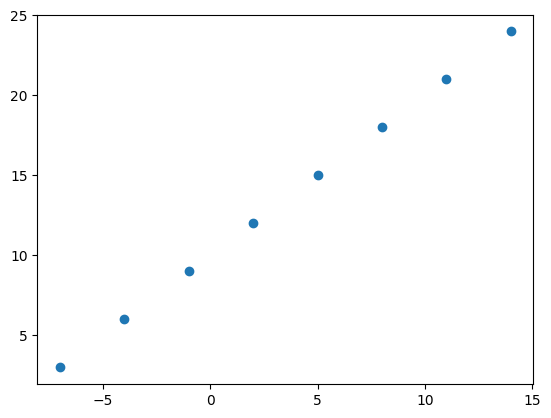

In [2]:


X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

In [3]:
# Demo tensor for housing price pred

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

2025-02-11 19:36:15.485495: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-11 19:36:15.485655: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-11 19:36:15.485660: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1739331375.487204 2875989 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1739331375.487572 2875989 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

### Steps in modeling in tensorflow
1. Create a Model - Define input and output layers. Along with hidden NN layers.
2. Compile model - Define Loss function, Optimizer, and evaluation metric.
3. Fit Model

In [4]:
tf.random.set_seed(42)


# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X,axis=-1),y, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 11.2553 - mae: 11.2553

2025-02-11 19:36:15.787623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 11.2553 - mae: 11.2553
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.1228 - mae: 11.1228
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.9903 - mae: 10.9903
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.8578 - mae: 10.8578
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.7253 - mae: 10.7253
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.5928 - mae: 10.5928
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.4603 - mae: 10.4603
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.3278 - mae: 10.3278
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.1953 - mae: 10.1953
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.0628 - mae: 10.0628
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.9303 - mae: 9.9303
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.7978 - mae: 9.7978
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step -

In [5]:
# Make a prediction

model.predict(np.array([17.], dtype=np.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[29.800518]], dtype=float32)

## Improving the model

1. **Create a model** -- Add more layers, increase number of hidden units (neurons) within hidden layer, change activation function on each label
2. **Compile Model**  -- Change optimization function or **learning rate** of the function
3. **Fitting model** -- Fit model for more **epochs** or on more data. 

In [6]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(X.reshape(-1,1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - loss: 13.6949 - mae: 13.6949
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.0814 - mae: 13.0814
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.4456 - mae: 12.4456
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.7867 - mae: 11.7867
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.0960 - mae: 11.0960
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.3717 - mae: 10.3717
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.6157 - mae: 9.6157
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.8271 - mae: 8.8271
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.0021 - mae: 8.0021
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.1407 - mae: 7.1407
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.4369 - mae: 6.4369
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6027 - mae: 6.6027
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [7]:
model.predict(np.array([14.]))
# X,y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[25.0274]], dtype=float32)

## Evaluating a model

- In pRactice, 
Build Model -> Fit it -> Evaluate it -> (Tweak <--> Fit) -> Evaluate (See above updating stuff like the optimizer to Adam from SGD, adding learning_rate, adding layers, epochs etc) ** AADJUSTING LEARNING_RATE IS THE MOST POWERFUL TOOL**

### Visualize
- The data  
- The model -- How does it look
- THe training -- Performance
- THe predictions -- how do preds of a model line up against the ground truth 

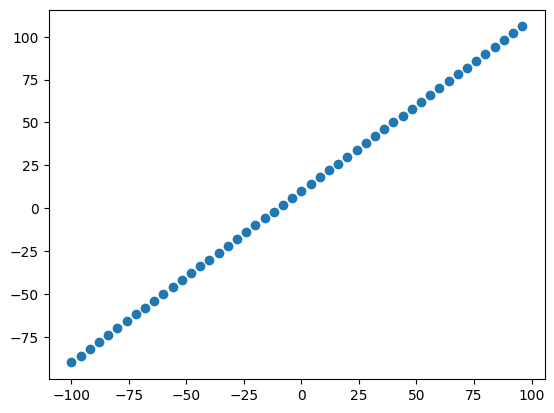

In [8]:
X = tf.range(-100, 100, 4)
y = X+10
plt.scatter(X,y)

### The 3 sets
- Train Set - 70-80%
- Validation set - Model gets tuned on this data, which is 10-15%
- Train set - 10-15%

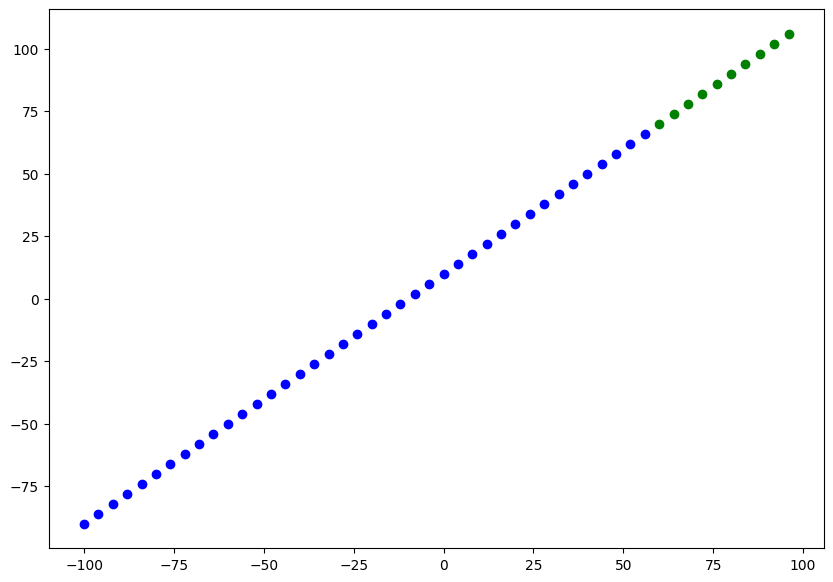

In [9]:
X_train = X[:40]
y_train = y[:40]

X_test=X[40:]
y_test=y[40:]

plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Training')

In [10]:
tf.random.set_seed(40)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
], name="one_more_dude")

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=100, verbose=0)

/Users/kraytor/Projects/TensorflowCourse/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "one_more_dude"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

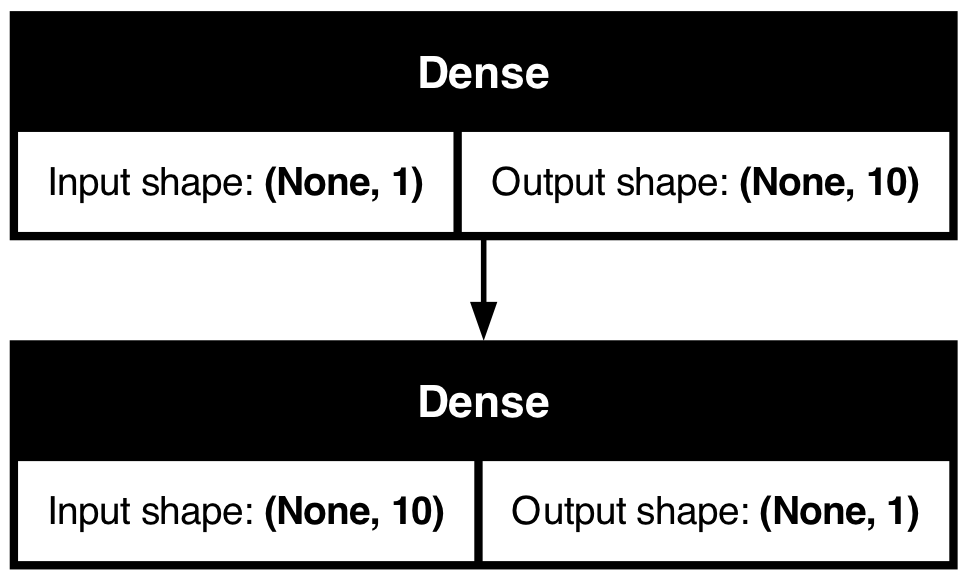

In [12]:

from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualizing model preds
to visualize predictions its a good idea to plot them against the ground truth label. Often youll see y_test or y_true versus y_pred

In [43]:
mae = tf.metrics.MeanAbsoluteError()
mse = tf.metrics.MeanSquaredError()

def print_metrics(y_test, y_pred):
    print('MAE: ', mae(y_test, y_pred))
    print('MSE: ', mse(y_test, y_pred))

def plot_predictions(X_train, y_train, X_test, y_test, y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(X_train, y_train, c='b', label='Train')
    plt.scatter(X_test, y_test, c='g', label='Test')
    plt.scatter(X_test, y_pred, c='r', label='Predictions')
    plt.legend()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


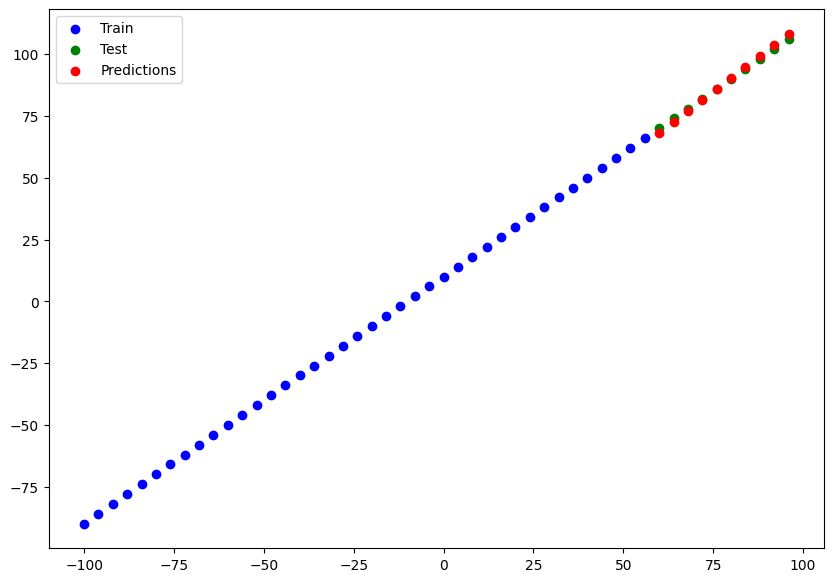

In [24]:
y_pred = model.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test,y_pred)



## Evaluating models prediction
##### Regressions uses 2 metrics mostly
- MAE : Mean Absolute Error "On avg how wrong is each models preds"
- MSE : Mean Squared Error: "Square the average errors"

In [44]:
# Calculate MAE outside algo
print_metrics(y_test, y_pred)

MAE:  tf.Tensor(1.1082405, shape=(), dtype=float32)
MSE:  tf.Tensor(1.6671712, shape=(), dtype=float32)


### Optimize Babyyy!
lets do 3 models
1. 1 layer, 100 epochs
2. 2 layers, 100 epochs
3. 2 layers, 500 epochs

##### Model 1

In [40]:

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(X_train, y_train, epochs=100)

/Users/kraytor/Projects/TensorflowCourse/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13.0724 - mae: 13.0724 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.0992 - mae: 11.0992
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.0906 - mae: 9.0906
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0832 - mae: 9.0832
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0759 - mae: 9.0759
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0685 - mae: 9.0685
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.0611 - mae: 9.0611
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0538 - mae: 9.0538
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0464 - mae: 9.0464
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0390 - mae: 9.0390
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.0317 - mae: 9.0317
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0243 - mae: 9.0243
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14m

MAE:  tf.Tensor(11.43722, shape=(), dtype=float32)
MSE:  tf.Tensor(239.6094, shape=(), dtype=float32)


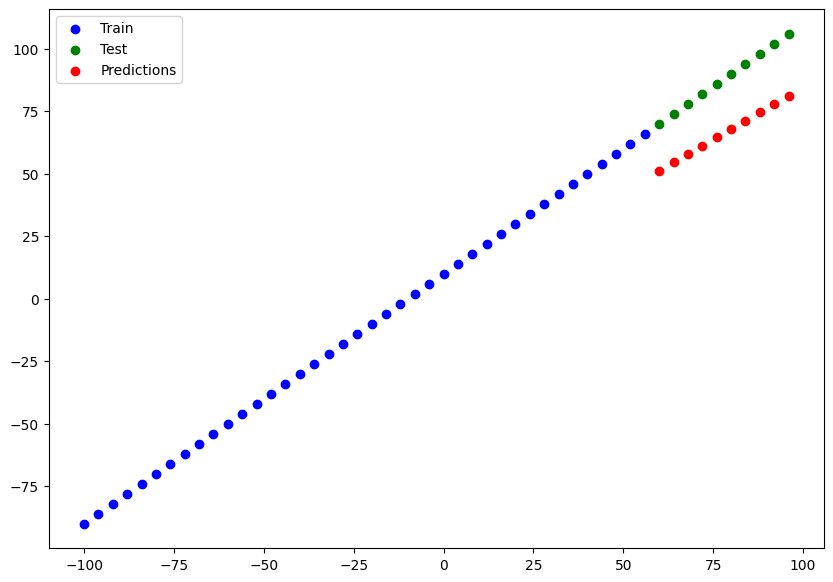

In [45]:
y_preds_1=model_1(X_test)
plot_predictions(X_train, y_train, X_test, y_test,y_preds_1)
print_metrics(y_test, y_preds_1)

##### Model 2

In [51]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_2.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 40.6316 - mae: 40.6316 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 42.7318 - mae: 42.7318
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.5462 - mae: 26.5462
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.3804 - mae: 33.3804
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30.4174 - mae: 30.4174
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.0944 - mae: 16.0944
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.2895 - mae: 16.2895
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.4061 - mae: 16.4061
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.4832 - mae: 16.4832
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.5412 - mae: 16.5412
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.5908 - mae: 16.5908
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.8716 - mae: 16.8716
Epoch 13/100
2/2 ━━━━━━━

MAE:  tf.Tensor(8.085378, shape=(), dtype=float32)
MSE:  tf.Tensor(160.66557, shape=(), dtype=float32)


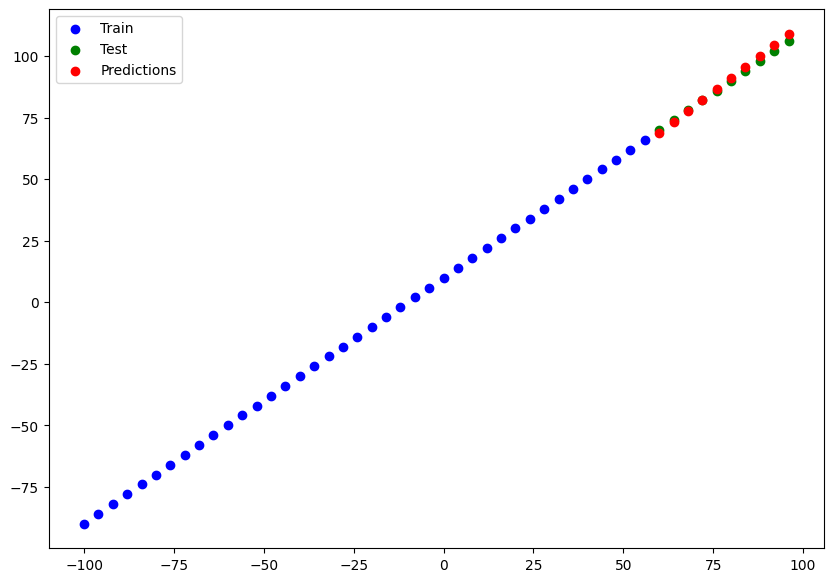

In [52]:
y_preds_2=model_2(X_test)
plot_predictions(X_train, y_train, X_test, y_test,y_preds_2)
print_metrics(y_test, y_preds_2)

##### Model 3

In [56]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500


/Users/kraytor/Projects/TensorflowCourse/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 29.9286 - mae: 29.9286 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.1784 - mae: 35.1784
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.5746 - mae: 17.5746
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.2430 - mae: 19.2430
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.5487 - mae: 14.5487
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.0544 - mae: 22.0544
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.0934 - mae: 13.0934
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.4130 - mae: 23.4130
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.5654 - mae: 13.5654
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 24.7776 - mae: 24.7776
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.2642 - mae: 13.2642
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 23.9945 - mae: 23.9945
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━

MAE:  tf.Tensor(14.626691, shape=(), dtype=float32)
MSE:  tf.Tensor(386.09512, shape=(), dtype=float32)


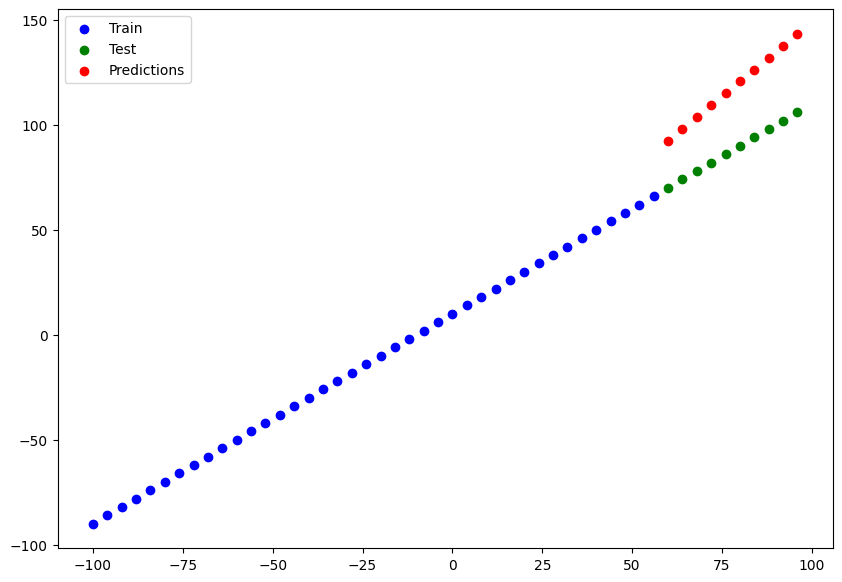

In [58]:
y_preds_3=model_3(X_test)
plot_predictions(X_train, y_train, X_test, y_test,y_preds_3)
print_metrics(y_test, y_preds_3)